In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [79]:
X_data = np.array([1,3,6,9, 12, 25])
y_data = np.array([1,6,12,18,24, 50])

X_test = np.array([4, 10])
y_test = np.array([8, 20])

In [80]:
def calculate_loss(preds, true_values):
    loss =  (1/len(preds)) * np.sum((true_values - preds) ** 2)
    return loss

In [81]:
def calculate_gradients(data, preds, true_values):
    da0 = (-2 / len(data)) * np.sum(data * (true_values - preds))
    da1 = (-2 / len(data)) * np.sum((true_values - preds))
    return da0, da1

In [82]:
def update_values(learning_rate, a0, a1, da0, da1):
    a0 = a0 - learning_rate * da0
    a1 = a1 - learning_rate * da1
    return a0, a1

In [83]:
print(1,int(2 / 3), 2 % 3)

1 0 2


In [84]:
def plot_fitting(X_data, y_data, preds, loss, num_plot, ax):
    ax[int(num_plot / 2), num_plot % 2 ].scatter(X_data, y_data)
    ax[int(num_plot / 2), num_plot % 2 ].plot(X_data, preds)
    ax[int(num_plot / 2), num_plot % 2 ].title.set_text(f'plot number: {num_plot}, loss: {loss:.2f}')

In [85]:
alfa0 = 0.0
alfa1 = 0.0
da0, da1 = 0.0, 0.0
lr = 0.0001
preds = X_data * alfa0 + alfa1 
true_values = y_data

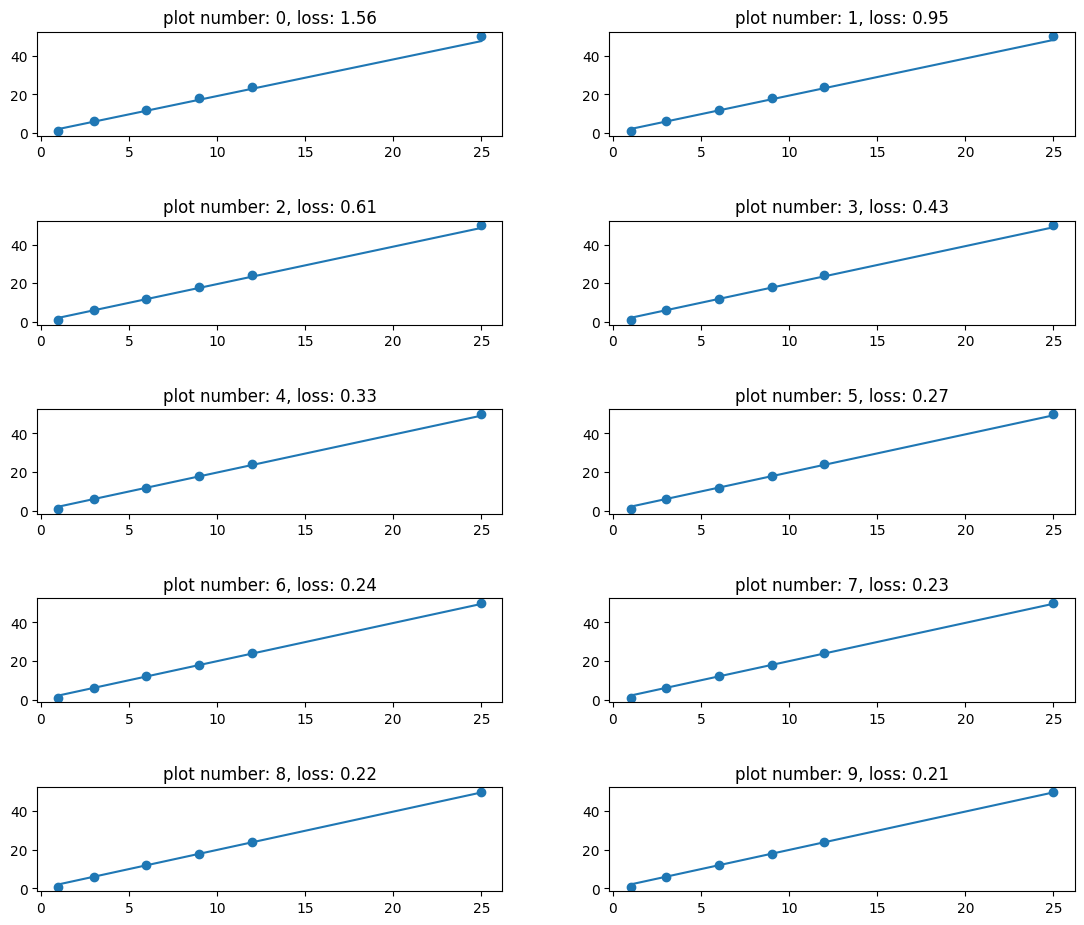

[ 2.10315813  6.07686633 12.03742864 17.99799094 23.95855324 49.78765654] 1.9869962901406162 0.1162719791245558
----------
predictions on test data: [ 8.06425714 19.98623488], true values: [ 8 20]


In [87]:
fig, ax = plt.subplots(5,2, figsize=(12,10))
fig.tight_layout(pad=4.0)
num_plot = 0
for i in range(100):
    preds = X_data * alfa0 + alfa1 
    #print(preds, alfa0, alfa1)
    loss = calculate_loss(preds, true_values)
    #print(loss)
    da0, da1 = calculate_gradients(X_data, preds, true_values)
    #print(da0, da1)
    alfa0, alfa1 = update_values(lr, alfa0, alfa1, da0, da1)
    #print(alfa0, alfa1)
    if i % 10 == 0:
        plot_fitting(X_data, true_values, preds, loss, num_plot, ax)
        num_plot +=1


plt.show()

print(preds, alfa0, alfa1)
print('----------')
preds = X_test * alfa0 + alfa1 

print(f'predictions on test data: {preds}, true values: {y_test}')

In [ ]:
print(alfa0)

In [ ]:
36*36